In [22]:
from model import Module, Sequential
from activation import ReLU, Tanh, MSELoss
from linear import Linear
from disc_generator import generate_disc_set, plot_set
import math
import torch
import matplotlib.pyplot as plt
import os   
os.environ['KMP_DUPLICATE_LIB_OK']='True'
%matplotlib inline

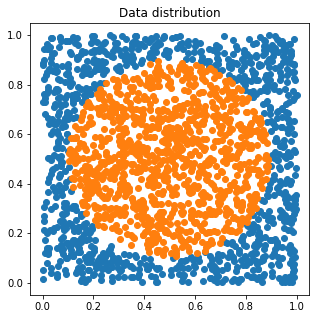

epoch: 0, loss: 522.37, train error 51.90%, test error 50.55% 
epoch: 1, loss: 439.10, train error 24.70%, test error 25.80% 
epoch: 2, loss: 299.66, train error 11.70%, test error 12.20% 
epoch: 3, loss: 188.91, train error 10.85%, test error 9.65% 
epoch: 4, loss: 250.99, train error 13.25%, test error 13.95% 
epoch: 5, loss: 189.77, train error 13.35%, test error 14.55% 
epoch: 6, loss: 200.53, train error 12.00%, test error 13.10% 
epoch: 7, loss: 170.93, train error 12.55%, test error 13.15% 
epoch: 8, loss: 164.18, train error 11.55%, test error 11.20% 
epoch: 9, loss: 148.43, train error 11.20%, test error 11.65% 
epoch: 10, loss: 153.65, train error 11.65%, test error 12.45% 
epoch: 11, loss: 138.92, train error 12.00%, test error 13.05% 
epoch: 12, loss: 130.01, train error 9.90%, test error 10.70% 
epoch: 13, loss: 129.12, train error 10.40%, test error 11.00% 
epoch: 14, loss: 122.99, train error 8.55%, test error 9.05% 
epoch: 15, loss: 101.69, train error 6.55%, test error

In [2]:
from model import Module, Sequential
from activation import ReLU, Tanh, MSELoss
from linear import Linear
from disc_generator import generate_disc_set, plot_set
from train import train_model

train_input, train_target_one_hot, test_input, test_target_one_hot, test_target, train_target = generate_disc_set(2000)



plot_set(train_input, train_target)

input_units = 2
output_units = 1
hidden = 25
nb_epochs = 100
mini_batch_size = 100
eta = 1e-3
momentum = 0.9


mini_model = Sequential(
                        Linear(input_units, hidden),  Tanh(),
                        Linear(hidden, hidden),       Tanh(),
                        Linear(hidden, hidden),       ReLU(),
                        Linear(hidden, output_units), ReLU())



train_model(mini_model, train_input, train_target,
                        test_input,  test_target,
                        nb_epochs,   mini_batch_size,
                        eta = eta,   momentum = momentum,
                        show_graphs = False, show_steps = True)


In [33]:
train_input, train_target_one_hot, test_input, test_target_one_hot, test_target, train_target = generate_disc_set(2000)


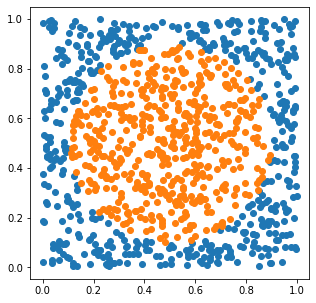

In [3]:
plot_set(train_input, train_mask)

In [68]:
def train_model(model, train_input, train_target, test_input, test_target, nb_epochs, mini_batch_size, criterion=MSELoss(), eta = 1e-3, momemtum = 0,show_graphs = False, show_steps = True):
    
    for e in range(nb_epochs):
        sum_loss = 0
        for b in range(0, train_input.size(0), mini_batch_size):
            # forward pass
            output = model.forward(train_input.narrow(0, b, mini_batch_size))
            loss = criterion.forward(output, train_target.narrow(0, b, mini_batch_size))
            sum_loss += loss.item()
            
            model.zero_gradient()
            model.backward(criterion.backward(output, train_target.narrow(0, b, mini_batch_size)))
            model.SGD(eta, momentum)
            
            train_error = 0
            test_error = 0
            for c in range(0, train_input.size(0), mini_batch_size):
                output = model.forward(train_input.narrow(0, c, mini_batch_size))
                pred   = torch.where(output**2 < 0.25, 0, 1)
                train_error = train_error + (pred != train_target.narrow(0, c, mini_batch_size)).sum()

                output = model.forward(test_input.narrow(0, c, mini_batch_size))
                pred   = torch.where(output**2 < 0.25, 0, 1)
                test_error = test_error + (pred != test_target.narrow(0, c, mini_batch_size)).sum()
                
            train_error_rate = (train_error/train_input.size(0)) * 100
            test_error_rate = (test_error/test_input.size(0)) * 100
            
            
        if show_graphs == True:    
            if e % 3 ==  0:
                    output = model.forward(train_input)
                    pred   = torch.where(output < 0.5, 0, 1)
                    scatter = torch.cat((train_input, pred),1)
                    scatter_false = scatter[scatter[:,2] == 0]
                    scatter_true  = scatter[scatter[:,2] == 1]
                
                    plt.figure(figsize=(5, 5))
                    plt.scatter(scatter_false[:,0], scatter_false[:,1], )
                    plt.scatter(scatter_true[:,0], scatter_true[:,1], )
                    
                    

                
        if show_steps == True:
            print("epoch: {}, loss: {:.02f}, train error {:.02f}%, test error {:.02f}% ".format(e, sum_loss, train_error_rate, test_error_rate))
        
        if test_error == 0:
            print("I already know what is a circle")
            break
            
        if e > 20000:
            print("Master why did you make my so dumb?")
            break   
            
    if show_steps == False:         
        print("epoch: {}, loss: {:.02f}, train error {:.02f}%, test error {:.02f}% ".format(e, sum_loss, train_error_rate, test_error_rate))

        
            
    
            
    
            
    
            
    

In [45]:
input_units = 2
output_units = 1
hidden = 25
nb_epochs = 10000
mini_batch_size = 100
eta = 1e-3
momentum = 0.9
criterion = 

In [55]:
mini_model = Sequential(
                        Linear(input_units, hidden),  Tanh(),
                        Linear(hidden, hidden),       Tanh(),
                        Linear(hidden, hidden),       Tanh(),
                        Linear(hidden, output_units), Tanh())

In [70]:
mini_model.reset_parameters()
train_model(mini_model, train_input, train_mask, test_input, test_mask, nb_epochs, mini_batch_size, eta = 1e-3, momemtum = momentum, show_graphs = False, show_steps = True)

epoch: 0, loss: 730.59, train error 49.70%, test error 50.60% 
epoch: 1, loss: 537.77, train error 40.90%, test error 40.80% 
epoch: 2, loss: 492.51, train error 51.25%, test error 52.80% 
epoch: 3, loss: 466.40, train error 27.90%, test error 28.75% 
epoch: 4, loss: 397.92, train error 29.45%, test error 28.60% 
epoch: 5, loss: 370.16, train error 27.05%, test error 27.25% 
epoch: 6, loss: 362.48, train error 27.75%, test error 26.65% 
epoch: 7, loss: 357.30, train error 27.70%, test error 26.85% 
epoch: 8, loss: 353.29, train error 26.80%, test error 26.30% 
epoch: 9, loss: 346.36, train error 26.10%, test error 25.40% 
epoch: 10, loss: 329.41, train error 23.85%, test error 23.05% 
epoch: 11, loss: 277.62, train error 17.50%, test error 17.20% 
epoch: 12, loss: 210.63, train error 5.30%, test error 5.15% 
epoch: 13, loss: 159.55, train error 4.15%, test error 5.10% 
epoch: 14, loss: 134.44, train error 4.95%, test error 4.45% 
epoch: 15, loss: 119.40, train error 7.75%, test error 6

KeyboardInterrupt: 

In [55]:
11 % 10

1

In [14]:
mini_model.parameters()[4]

(tensor([[ 1.7969e-01, -1.4626e-01, -6.2811e-02, -3.5323e-02, -2.7210e-02,
           1.8557e-01,  8.4366e-02, -1.1930e-01, -1.7953e-02,  1.0981e-03,
           2.5345e-02, -2.2529e+00,  1.4221e-01,  5.9960e-01,  1.3652e-01,
           1.5509e-01,  5.9772e-01,  1.3858e+00,  5.3121e-02, -1.1755e+00,
           2.2179e-02,  9.3332e-02, -1.8358e-01, -3.1933e-01, -2.8285e-01]]),
 tensor([0.0228]))

In [25]:
math.log(10)

2.302585092994046